<a href="https://colab.research.google.com/github/jakuberwid/LMAD/blob/main/silhouette_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Indeks silhouette

jest indeksem obliczanym dla każdego obiektu, wyrażającym na ile blisko temu obiektowi do wszystkich pozostałych z jego grupy w stosunku do wszystkich pozostałych z innej (najbliższej grupy).


$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$
​

gdzie:

- $a(i)$ to średnia odległość obserwacji $x_i$ od pozostałych z jej grupy (*cohesion* - spójność),
- $b(i)$ to najmniejsza ze średnich odległości do pozostałych grup (*separation* - rozdzelenie). 

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
df = pd.DataFrame({"ai": np.arange(0.1, 5, 0.2), "bi": np.arange(4.9, 0, -0.2)})

In [ ]:
df

,ai,bi
0,0.1,4.9
1,0.3,4.7
2,0.5,4.5
3,0.7,4.3
4,0.9,4.1
5,1.1,3.9
6,1.3,3.7
7,1.5,3.5
8,1.7,3.3
9,1.9,3.1


In [ ]:
df['roznica'] = df.bi - df.ai
df['maks'] = df.max(axis = 1)
df['silh'] =df.roznica/df.maks

In [ ]:
df['silh_abs'] = df.silh.abs()

In [ ]:
round (df.silh,2)

0     0.98
1     0.94
2     0.89
3     0.84
4     0.78
5     0.72
6     0.65
7     0.57
8     0.48
9     0.39
10    0.28
11    0.15
12   -0.00
13   -0.15
14   -0.28
15   -0.39
16   -0.48
17   -0.57
18   -0.65
19   -0.72
20   -0.78
21   -0.84
22   -0.89
23   -0.94
24   -0.98
Name: silh, dtype: float64

## Interpretacja

Im bliższa $s(i)$  wartości 1, tym bardziej dany obiekt pasuje do swojej grupy, im bliższa wartości -1, tym bliżej temu obiektowi do grupy sąsiedniej. $s(i)$ bliskie 0 oznacza, że punkt znajduje się pomiędzy dwoma skupieniami.

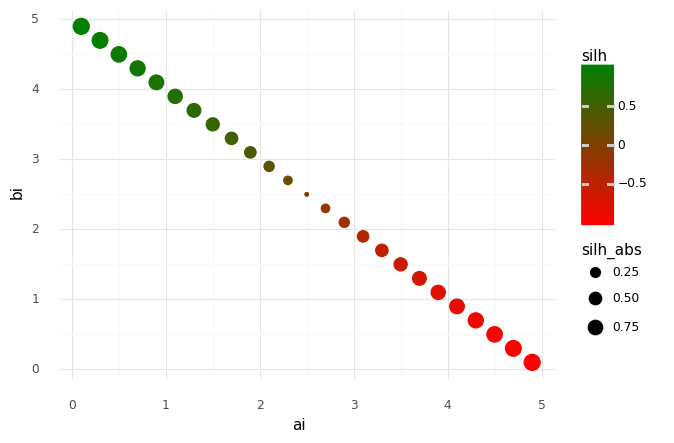

<ggplot: (8766322290445)>

In [ ]:
(ggplot(df, aes(x= 'ai', y = 'bi', color = 'silh', size ='silh_abs')) +
 geom_point() +
 scale_color_gradient(low='red', high='green') +
 theme_minimal()) 

## Przykład

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs

In [ ]:
n = 100

centra = [(-6,-6), (0,0), (6,6), (9,9)]

X, y = make_blobs(n_samples=n, n_features=2, centers=centra, cluster_std=1, random_state=0)

In [ ]:
df = pd.DataFrame(X, columns =['x1', 'x2'])
df['Grupy'] = y

In [ ]:
ks = range(2, 20)
sylwetki = []

for k in ks:
  km = KMeans (n_clusters=k).fit(df[['x1','x2']])
  sylwetki.append(silhouette_score(df[['x1','x2']],km.predict(df[['x1','x2']])))

In [ ]:
sylwetki_df = pd.DataFrame(pd.DataFrame({'K': ks,
                           'sylwetka' : sylwetki}))

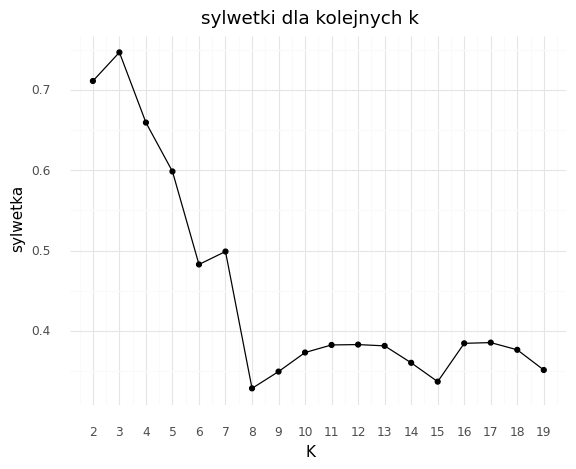

<ggplot: (8766295606769)>

In [ ]:
(ggplot(sylwetki_df, aes(x= 'K', y = 'sylwetka')) +
 geom_point() +
 geom_line() + 
 scale_x_continuous (breaks = ks) +
 theme_minimal() +
 labs (title = 'sylwetki dla kolejnych k'))